## Zomato EDA & Feature Engineering

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (14,8)
plt.style.use('ggplot')
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)


In [304]:
df = pd.read_csv("Zomatodataset/zomato.csv",encoding="latin-1")

In [305]:
df.shape

(9551, 21)

In [306]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [307]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [309]:
# Object basically means string - Can be categorical, text 

In [310]:
df.describe() # shows only numeric/float fields

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [311]:
df.describe(include="object")

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


## In Data Analysis we generally do the following things 

1. Missing values or Null values
2. Explore about numerical variables
3. Explore about categorical variables
4. Finding Relationship between features

In [312]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [313]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<AxesSubplot:>

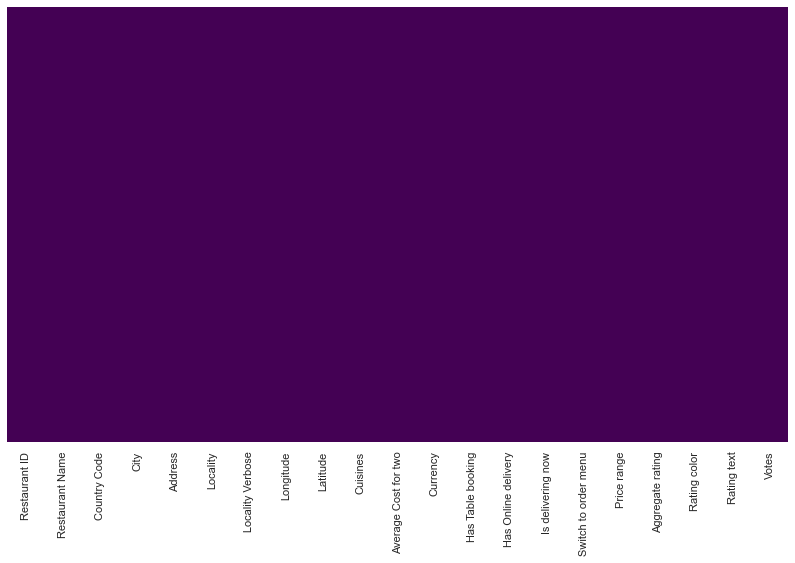

In [314]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [315]:
df_country = pd.read_excel('Zomatodataset/Country-Code.xlsx')

In [316]:
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [317]:
 df.rename(columns = {'Country_Code':'Country Code'}, inplace = True)

In [318]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [319]:
df_final = pd.merge(df, df_country, on='Country Code', how='left')

In [320]:
df_final.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [321]:
country_names = df_final.Country.value_counts().index

In [322]:
country_values = df_final.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x1b0a08e9940>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

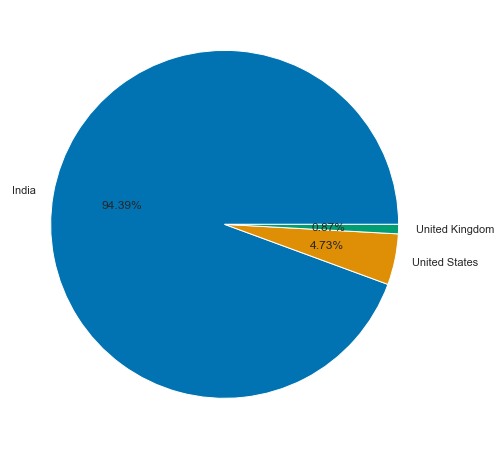

In [323]:
plt.pie(country_values[:3],labels=country_names[:3],autopct="%1.2f%%")

## Observation : 95% of transactions are from India. Remaining 4+% from US & UK. Transactions from other countries is very negligible

In [324]:
df_ratings = df_final.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Ratings Count'})

In [325]:
df_ratings

,Aggregate rating,Rating color,Rating text,Ratings Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Obeservations -
    Ratings
    - 4.5 to 4.9 - Excellent
    - 4.0 to 4.4 - Very Good
    - 3.5 to 3.9 - Good
    - 2.5 to 3.4 - Average
    - 1 to 2.4 -   Poor
    - 0        -   Not Rating 

<AxesSubplot:xlabel='Aggregate rating', ylabel='Ratings Count'>

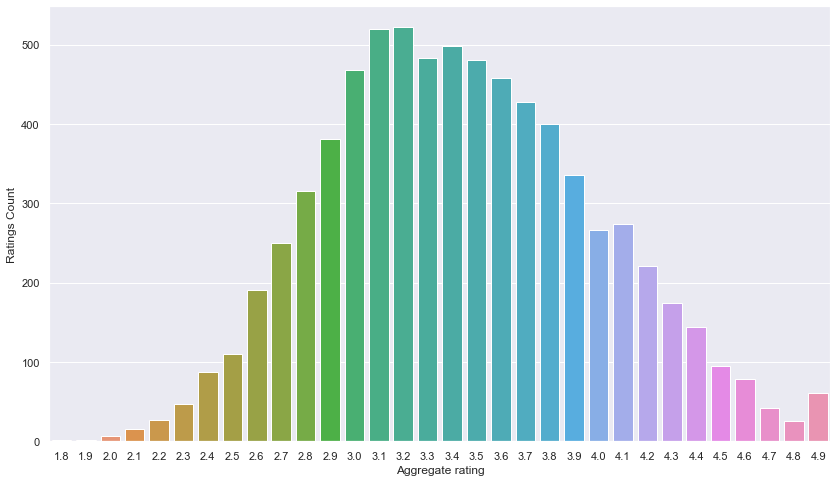

In [326]:
sns.barplot(x="Aggregate rating", y='Ratings Count',data=df_ratings[1:])

<AxesSubplot:xlabel='Aggregate rating', ylabel='Ratings Count'>

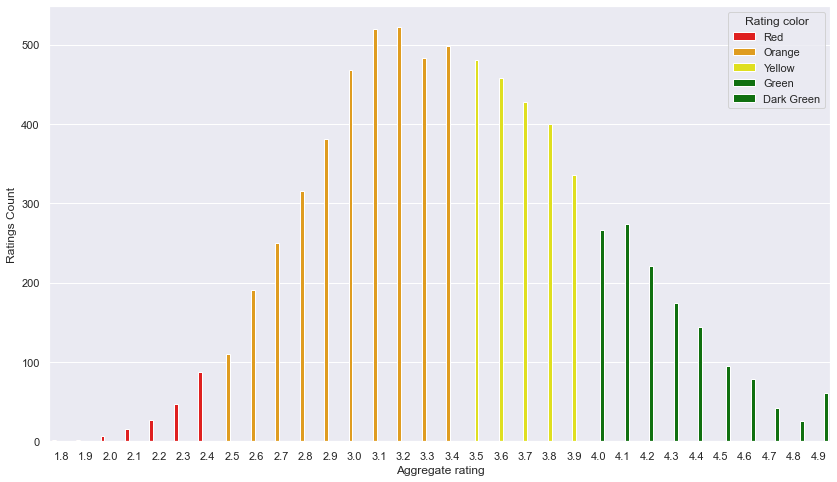

In [327]:
sns.barplot(x="Aggregate rating", y='Ratings Count',hue='Rating color',palette=['red','orange','yellow','green','green'], data=df_ratings[1:])

<AxesSubplot:xlabel='Rating color', ylabel='count'>

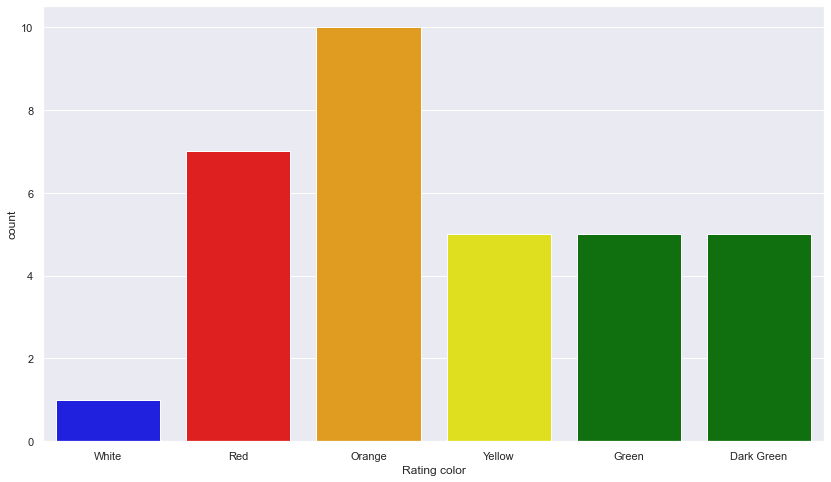

In [328]:
## Count Plot

sns.countplot(x="Rating color",data=df_ratings,palette=['blue','red','orange','yellow','green','green'],)

In [329]:
## Find the countries names that has given 0 rating

df_no_ratings = df_final[df_final['Rating color']=='White'].groupby(['Country']).size().sort_values(ascending=False).reset_index().rename(columns={0:"Count"})

In [330]:
df_no_ratings

,Country,Count
0,India,2139
1,Brazil,5
2,United States,3
3,United Kingdom,1


<BarContainer object of 4 artists>

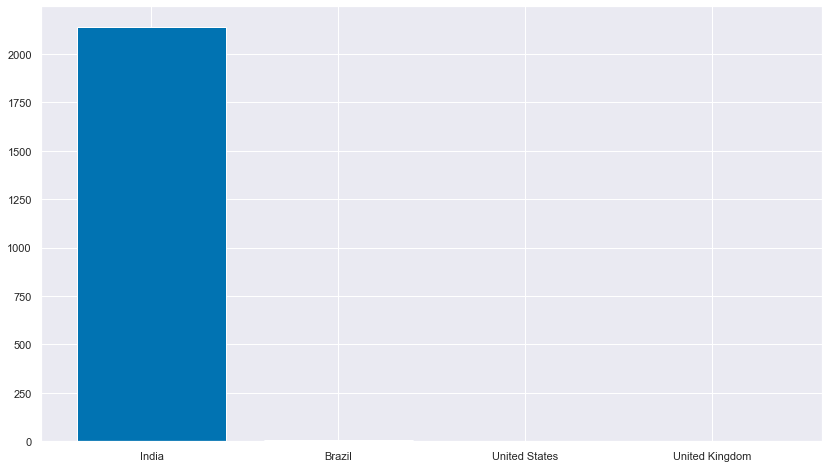

In [331]:
plt.bar(x="Country",height="Count", data=df_no_ratings)


In [332]:
df_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [333]:
df_currency = df_final.groupby(['Country','Currency']).size().sort_values(ascending=False).reset_index().rename(columns={0:"Count"})

In [334]:
df_currency

,Country,Currency,Count
0,India,Indian Rupees(Rs.),8652
1,United States,Dollar($),434
2,United Kingdom,Pounds(£),80
3,Brazil,Brazilian Real(R$),60
4,South Africa,Rand(R),60
5,UAE,Emirati Diram(AED),60
6,New Zealand,NewZealand($),40
7,Turkey,Turkish Lira(TL),34
8,Australia,Dollar($),24
9,Phillipines,Botswana Pula(P),22


In [335]:
df_online_delivery = df_final[['Country','Has Online delivery']].groupby(['Country','Has Online delivery']).size().reset_index().rename(columns={0:"Count"})

In [336]:
df_online_delivery

,Country,Has Online delivery,Count
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [337]:
df_final[df['Has Online delivery']=="Yes"].Country.value_counts().reset_index()

,index,Country
0,India,2423
1,UAE,28


In [338]:
city_labels = df_final.City.value_counts().index
city_values = df_final.City.value_counts().values

([<matplotlib.patches.Wedge at 0x1b0a3aa27c0>,
 [Text(-0.670402126274829, 0.9952693048045782, 'New Delhi'),
  Text(0.0680373001306968, -1.1980696665014625, 'Gurgaon'),
  Text(0.9588049337045856, -0.7215906728220268, 'Noida'),
  Text(1.191514736533466, -0.14245221171882788, 'Faridabad'),
  Text(1.1999413963697585, -0.0118593961985781, 'Ghaziabad')],
 [Text(-0.39106790699365024, 0.5805737611360038, '68.87%'),
  Text(0.0396884250762398, -0.698873972125853, '14.07%'),
  Text(0.5593028779943415, -0.42092789247951556, '13.59%'),
  Text(0.695050262977855, -0.0830971235026496, '3.16%'),
  Text(0.6999658145490256, -0.006917981115837224, '0.31%')])

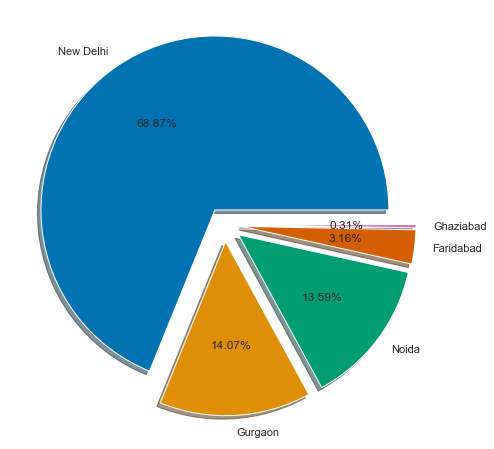

In [344]:
plt.pie(x=city_values[:5],labels=city_labels[:5],autopct="%1.2f%%",shadow=True, explode=[0.1,0.1,0.1, 0.1, 0.1])

In [345]:
## Top 10 Cusines 

df_top10_cuisines = df_final.groupby(['Cuisines']).size().sort_values(ascending=False).reset_index()[:10]


In [302]:
df_top10_cuisines

,Cuisines,0
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149
